In [22]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

In [23]:
filename = ( "food3.jpg")

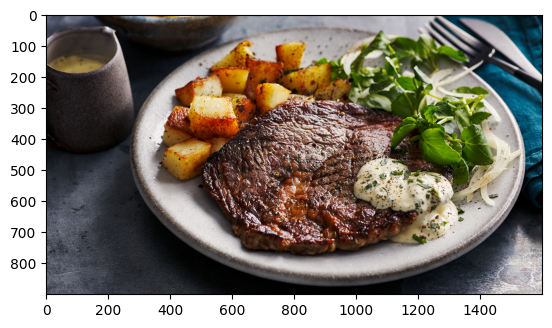

In [41]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread(filename)
plt.imshow(img[...,::-1])

In [24]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 5.3239e-01,  7.5571e-01, -1.9576e+00, -2.4401e+00,  3.4444e+00,
        -7.8992e-01,  1.1195e+00, -3.6867e-01,  1.5055e+00, -2.8306e-01,
         1.2138e+00,  8.0223e-01,  2.6339e+00,  4.9511e-02,  2.2107e+00,
        -6.7604e-01,  3.1011e-01,  2.7159e+00,  7.8333e-01,  1.6337e+00,
         1.5668e+00, -1.2827e+00,  7.2853e-01,  4.5839e-01, -4.1123e-01,
         8.6115e-01,  2.5731e+00,  3.9936e+00,  4.7502e-01,  1.6929e+00,
         2.3122e+00,  6.6996e+00,  5.2453e+00,  1.3267e+00, -2.2614e+00,
         2.0724e+00, -4.4535e-02,  2.3267e+00,  5.6769e-02, -2.4024e+00,
        -2.5053e+00,  1.7181e-01,  7.9943e-01, -2.2627e+00,  5.8148e-01,
        -4.7110e-01, -1.0178e+00, -6.1067e-01, -1.6471e-01, -3.3360e-01,
        -8.1431e-01,  8.0771e-01, -7.7489e-01,  2.3914e+00, -1.4128e+00,
        -4.0270e-02, -7.3095e-01, -3.3742e+00,  8.8303e-01,  1.7988e+00,
        -2.0999e-01, -1.9327e+00, -3.5961e-01, -2.7686e+00,  1.1150e+00,
        -1.2762e+00, -2.4577e-01, -3.4676e+00, -8.1

In [25]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-12-16 18:14:19--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.5’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2023-12-16 18:14:19 (12.4 MB/s) - ‘imagenet_classes.txt.5’ saved [10472/10472]



In [26]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

meat loaf 0.5346543192863464
plate 0.19844622910022736
mashed potato 0.1505986452102661
spatula 0.02700558677315712
rotisserie 0.018552420660853386


In [27]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

l1 = []
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
      cat = categories[top5_catid[i]]
      l1.append(cat)

In [28]:
l2 = [food.title().split() for food in l1]


In [29]:
import itertools
flat_list = list(itertools.chain(*l2))
print(flat_list)

['Meat', 'Loaf', 'Plate', 'Mashed', 'Potato', 'Spatula', 'Rotisserie']


In [30]:
!unzip -q -n 'food108.zip'

In [34]:
dataset_path = 'calories.csv'

In [35]:
import pandas as pd


In [36]:
df = pd.read_csv(dataset_path)
df.head(20)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ
5,CannedFruit,Canned Cranberries,100g,178 cal,748 kJ
6,CannedFruit,Canned Crushed Pineapple,100g,53 cal,223 kJ
7,CannedFruit,Canned Figs,100g,107 cal,449 kJ
8,CannedFruit,Canned Fruit Cocktail,100g,81 cal,340 kJ
9,CannedFruit,Canned Fruit Salad,100g,50 cal,210 kJ


In [37]:
df.columns

Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')

In [38]:
dffood = df.drop(['KJ_per100grams'], axis=1)

In [39]:
dffood.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams
0,CannedFruit,Applesauce,100g,62 cal
1,CannedFruit,Canned Apricots,100g,48 cal
2,CannedFruit,Canned Blackberries,100g,92 cal
3,CannedFruit,Canned Blueberries,100g,88 cal
4,CannedFruit,Canned Cherries,100g,54 cal


In [40]:
print(dffood.query('FoodCategory in @flat_list'))
print(dffood.query('FoodItem in @flat_list'))

    FoodCategory                 FoodItem per100grams Cals_per100grams
590         Meat                Alligator        100g          232 cal
591         Meat                     Beef        100g          248 cal
592         Meat             Beef Brisket        100g          242 cal
593         Meat               Beef Jerky        100g          410 cal
594         Meat                Beef Ribs        100g          238 cal
595         Meat          Beef Tenderloin        100g          218 cal
596         Meat                  Chicken        100g          219 cal
597         Meat           Chicken Breast        100g          172 cal
598         Meat        Chicken Drumstick        100g          185 cal
599         Meat              Chicken Fat        100g          898 cal
600         Meat          Chicken Giblets        100g          158 cal
601         Meat         Chicken Gizzards        100g          146 cal
602         Meat              Chicken Leg        100g          174 cal
603   